<a href="https://colab.research.google.com/github/jovitaand/UCI-Gender-Dataset/blob/main/UCI_Gender_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Setting Up the Dataset**

We'll be using the [**Adult Income Dataset** from the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult).

This dataset examines whether a person earns more than $50K/year based on factors such as education, occupation, and marital status.

It raises questions about fairness in predicting people’s income based on demographic characteristics, so it's a good example of the sociotechnical aspects of AI we discussed in lecture.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset from UCI (it’s available via many sources or from your own directory)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, names=column_names, na_values=' ?')

# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
len(df)

32561

Before we dive into building a machine learning model, it's crucial to perform **exploratory data analysis (EDA)** to understand the dataset better. This will help us uncover trends, anomalies, and potential biases in the data. We'll look at descriptive statistics for numerical features, the distribution of categorical features, and visualize key attributes of the dataset.

In [ ]:
# Drop rows with missing values
df = df.dropna()

# Get basic descriptive statistics
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
len(df)

30162

Let's now look at the distributions of important categorical features like race, sex, education, and workclass to check for imbalances.


Distribution of relationship:

relationship
Husband           41.320204
Not-in-family     25.615012
Own-child         14.806710
Unmarried         10.649161
Wife               4.661495
Other-relative     2.947417
Name: proportion, dtype: float64


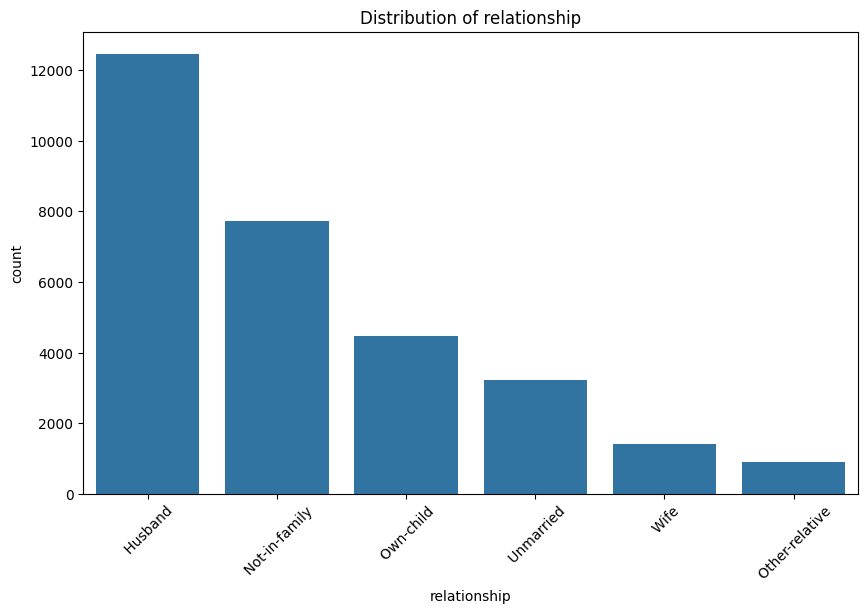


Distribution of native_country:

native_country
United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
India                          0.331543
El-Salvador                    0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
China                          0.225449
Italy                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Iran                           0.139248
Taiwan                         0.139248
Haiti                          0.139248
Portugal                       

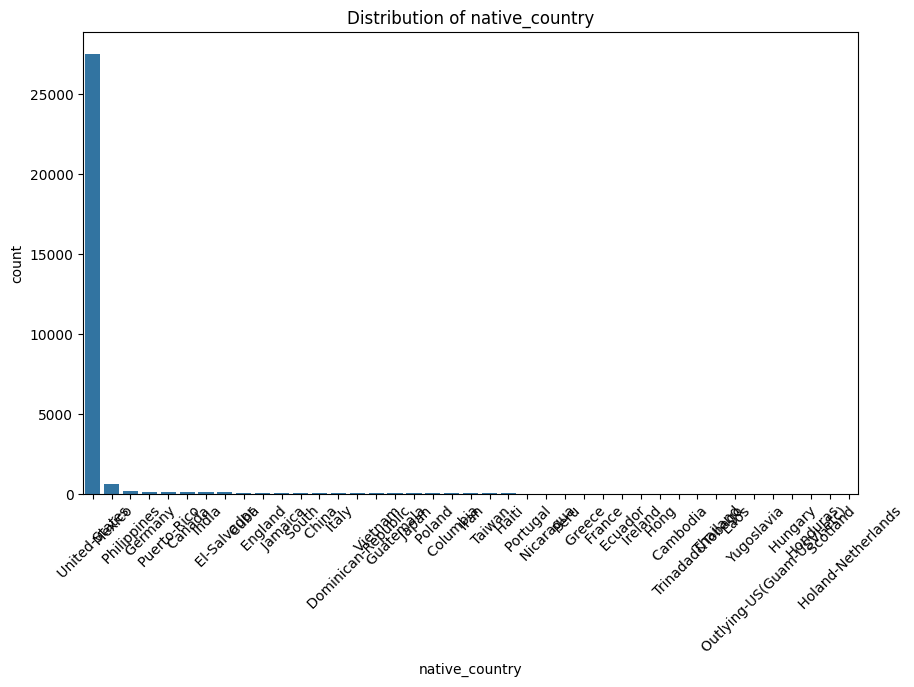


Distribution of race:

race
White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: proportion, dtype: float64


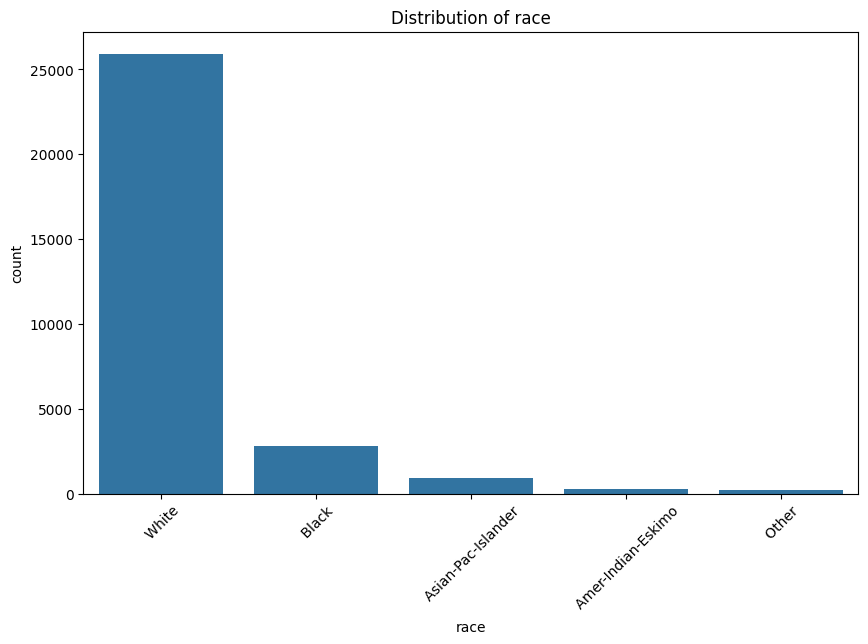


Distribution of sex:

sex
Male      67.568464
Female    32.431536
Name: proportion, dtype: float64


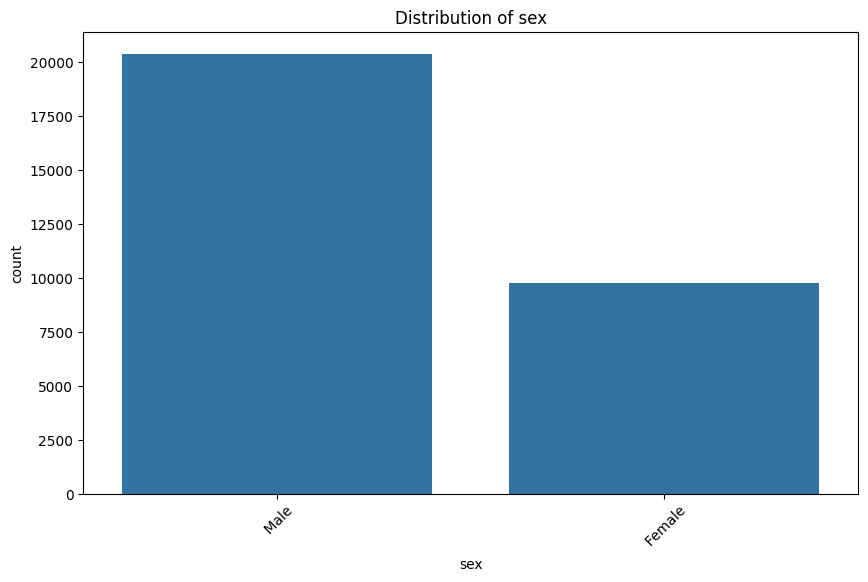


Distribution of education:

education
HS-grad         32.623831
Some-college    22.140442
Bachelors       16.723029
Masters          5.394205
Assoc-voc        4.333267
11th             3.474571
Assoc-acdm       3.341953
10th             2.718653
7th-8th          1.846695
Prof-school      1.796963
9th              1.508521
12th             1.249917
Doctorate        1.243286
5th-6th          0.954844
1st-4th          0.500630
Preschool        0.149194
Name: proportion, dtype: float64


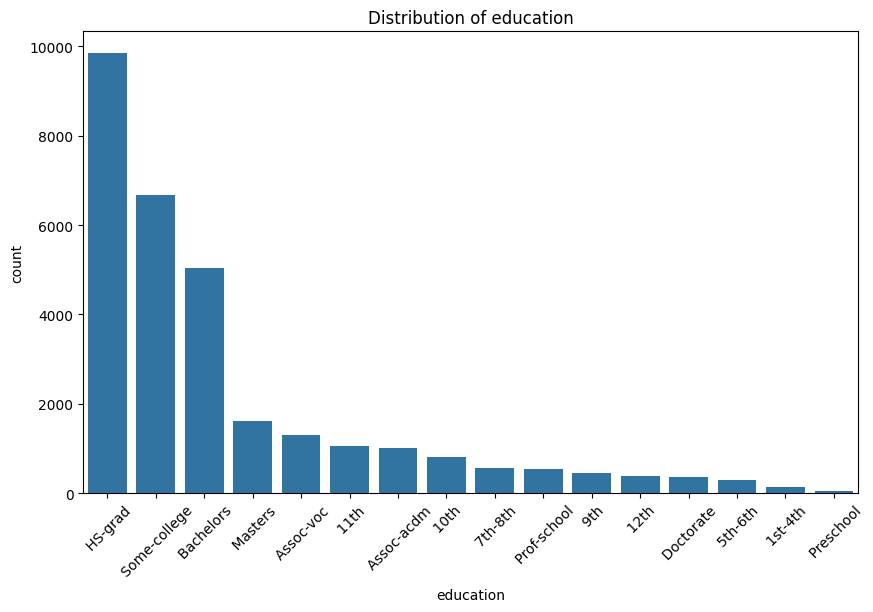


Distribution of workclass:

workclass
Private             73.887673
Self-emp-not-inc     8.285260
Local-gov            6.852994
State-gov            4.240435
Self-emp-inc         3.560772
Federal-gov          3.126451
Without-pay          0.046416
Name: proportion, dtype: float64


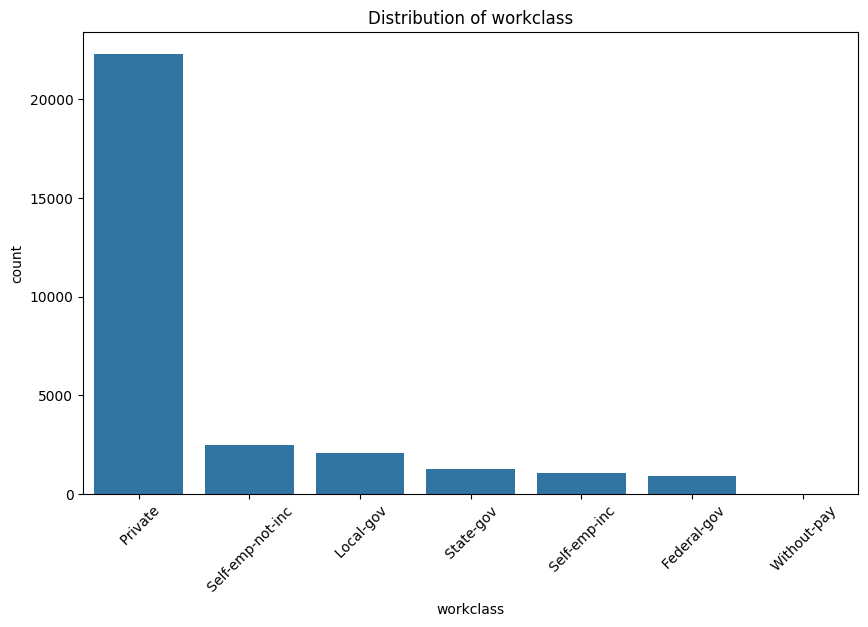


Distribution of marital_status:

marital_status
Married-civ-spouse       46.631523
Never-married            32.245872
Divorced                 13.971222
Separated                 3.113189
Widowed                   2.741861
Married-spouse-absent     1.226709
Married-AF-spouse         0.069624
Name: proportion, dtype: float64


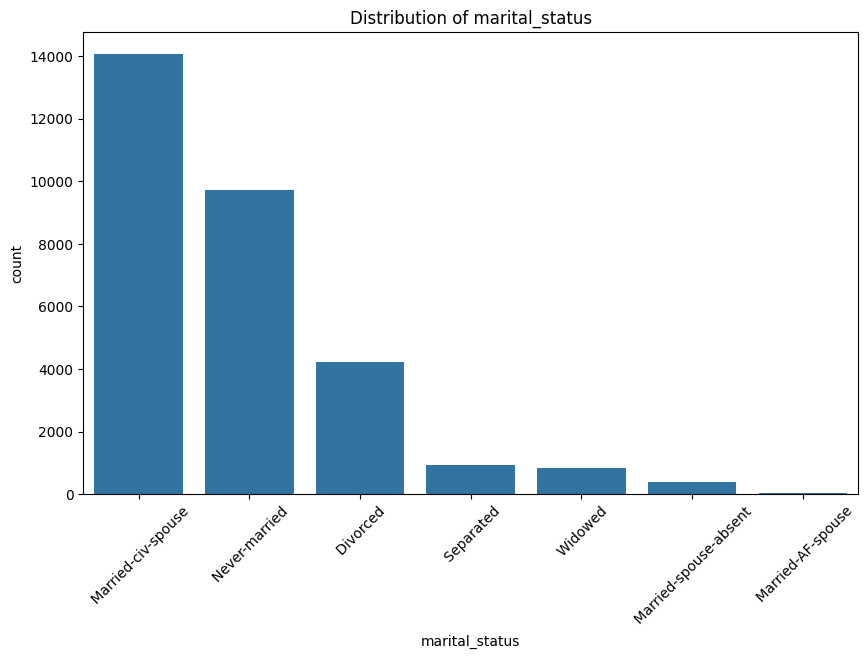


Distribution of occupation:

occupation
Prof-specialty       13.387706
Craft-repair         13.361183
Exec-managerial      13.235197
Adm-clerical         12.336715
Sales                11.882501
Other-service        10.649161
Machine-op-inspct     6.518135
Transport-moving      5.211856
Handlers-cleaners     4.475831
Farming-fishing       3.278960
Tech-support          3.023672
Protective-serv       2.135137
Priv-house-serv       0.474106
Armed-Forces          0.029839
Name: proportion, dtype: float64


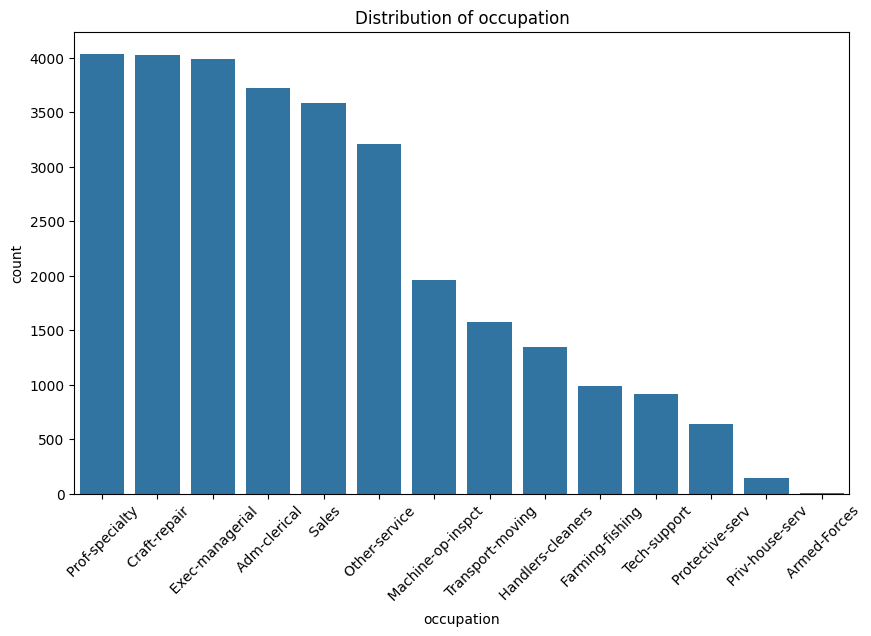


Distribution of income:

income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64


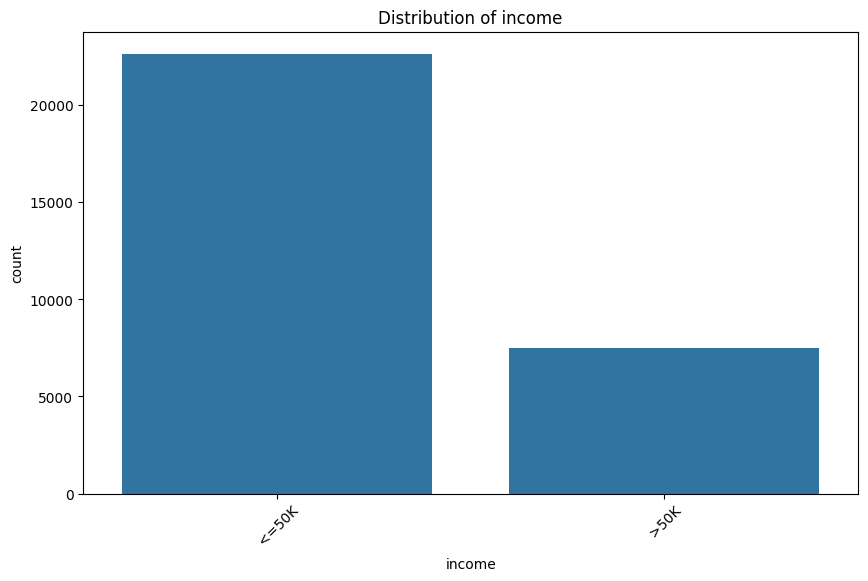

In [ ]:
# Categorical feature distributions
categorical_columns = ['relationship', 'native_country', 'race', 'sex', 'education', 'workclass', 'marital_status', 'occupation', 'income']

# Displaying the distribution of each categorical variable
for col in categorical_columns:
    print(f"\nDistribution of {col}:\n")
    print(df[col].value_counts(normalize=True) * 100)

    # Plot each categorical variable in a separate chart
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

Let’s now explore relationships between key features (like age, hours per week, and education_num) and the target variable (income) to see how they might influence the outcome.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


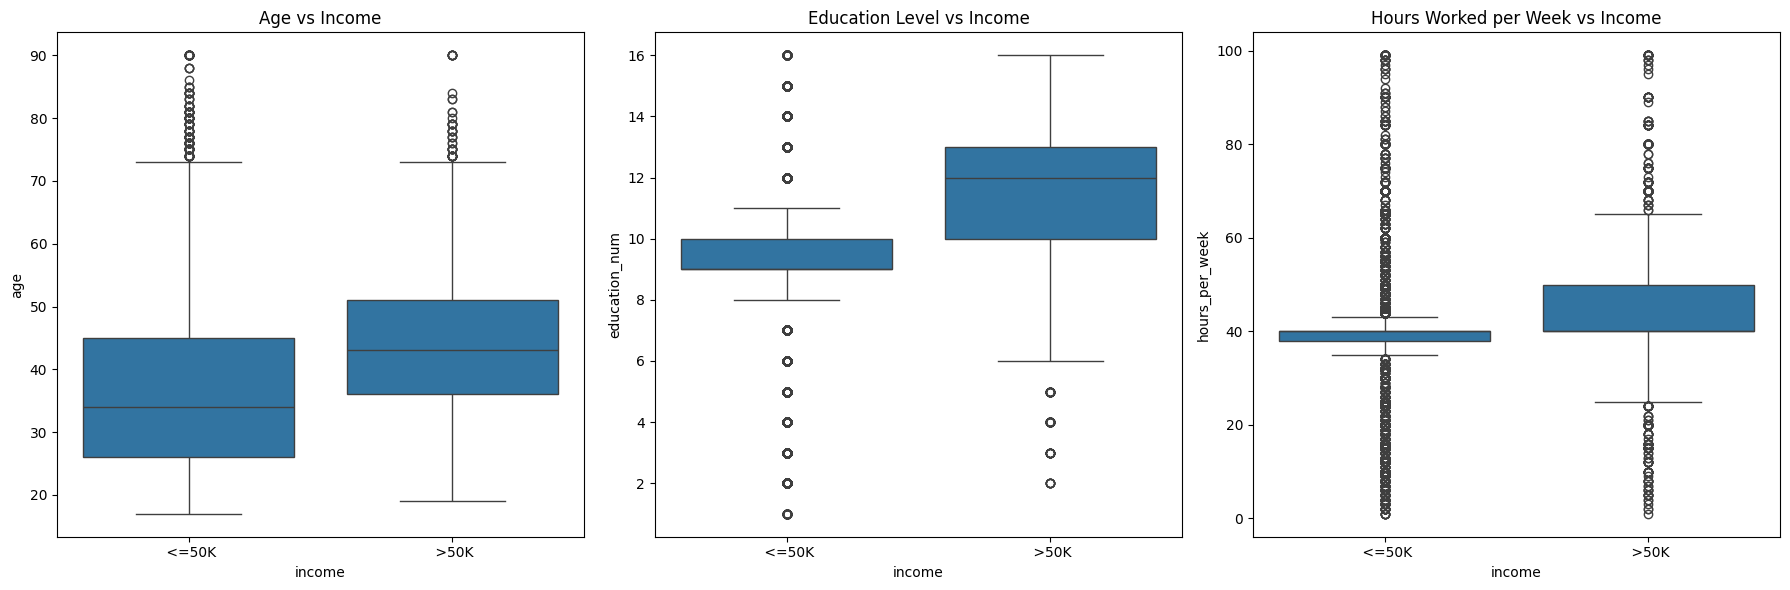

In [ ]:
# Plotting age, education_num, and hours_per_week vs income
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='income', y='age', ax=ax[0])
ax[0].set_title('Age vs Income')

sns.boxplot(data=df, x='income', y='education_num', ax=ax[1])
ax[1].set_title('Education Level vs Income')

sns.boxplot(data=df, x='income', y='hours_per_week', ax=ax[2])
ax[2].set_title('Hours Worked per Week vs Income')

plt.tight_layout()
plt.show()

Lastly, we’ll create a correlation heatmap to understand how the numerical features are correlated with one another. High correlations might indicate multicollinearity (where features are highly related), which we need to account for in modeling.

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'native_country_ Canada', 'native_country_ China',
       'native_country_ Columbia', 'native_country_ Cuba',
       'native_country_ Dominican-Republic', 'native_country_ Ecuador',
       'native_country_ El-Salvador', 'native_country_ England',
       'native_country_ France', 'native_country_ Germany',
       'native_country_ Greece', 'native_country_ Guatemala',
       'native_country_ Haiti', 'native_country_ Holand-Netherlands',
       'native_country_ Honduras', 'native_country_ Hong',
       'native_country_ Hungary', 'native_country_ India',
       'native_country_ Iran', 'native_country_ Ireland',
       'native_country_ Italy', 'native_country_ Jamaica',
       'native_country_ Japan', 'native_country_ Laos',
       'nati

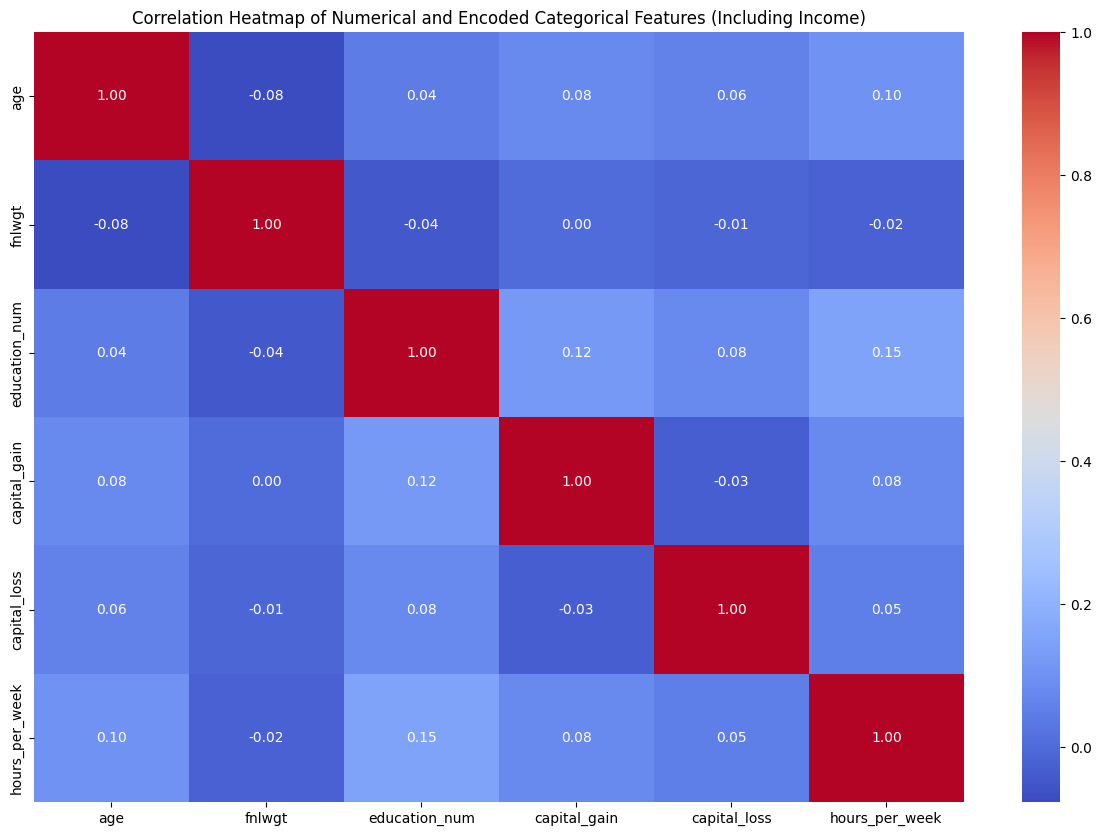

In [ ]:
import numpy as np

# Perform one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the column names to ensure 'income' is properly encoded
print(df_encoded.columns)  # Look for the new income column name (likely 'income_>50K')

# Select only numeric columns for the correlation matrix
numeric_df_encoded = df_encoded.select_dtypes(include=[np.number])

# Display the correlation heatmap, including income
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numerical and Encoded Categorical Features (Including Income)')
plt.show()

In [ ]:
df_encoded.dtypes

,0
age,int64
fnlwgt,int64
education_num,int64
capital_gain,int64
capital_loss,int64
...,...
occupation_ Protective-serv,bool
occupation_ Sales,bool
occupation_ Tech-support,bool
occupation_ Transport-moving,bool


Next, we need to perform a train/test split to prepare for fitting the model.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['income_ >50K'])  # Features (drop the encoded income column)
y = df_encoded['income_ >50K']  # Target (income)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (21113, 96)
Testing features shape: (9049, 96)
Training labels shape: (21113,)
Testing labels shape: (9049,)


## **3. Building a Simple Machine Learning Model**

Now that the data is ready, let's build a Logistic Regression model to predict whether someone earns more than $50K/year.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## **4. Evaluating the Model**

After training, we need to evaluate the model to see how well it performs on the test data. We’ll use a **confusion matrix** to visualize the performance of the model.

The confusion matrix helps us understand how many predictions were correct (true positives and true negatives) and how many were incorrect (false positives and false negatives).

This breakdown is crucial for evaluating fairness and bias in the model.

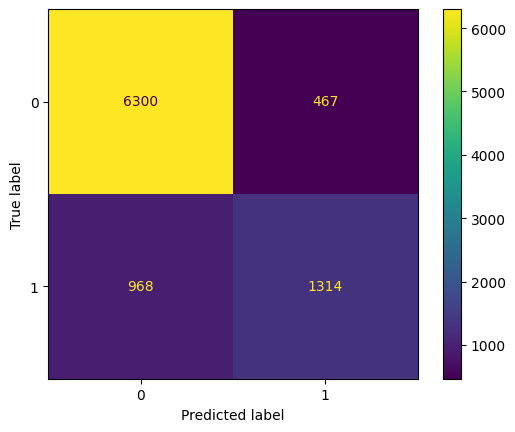

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix and transpose it
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with transposed axes
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

* True Positives (TP): Correctly predicted high income.
* True Negatives (TN): Correctly predicted low income.
* False Positives (FP): Incorrectly predicted high income (overprediction).
* False Negatives (FN): Incorrectly predicted low income (underprediction).

Generally speaking, the accuracy of a model is the ratio of correctly predicted instances to the total instances.

Formula: (TP + TN) / (TP + TN + FP + FN)

Let's calculate it using code:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8414


Accuracy is the best-known general performance measure but it may not be reliable if there are class imbalances. In that case, it's better to break down the confusion matrix further for a more detailed analysis.

One such measure is **precision**, or the proportion of positive identifications that were actually correct. It focuses on the **accuracy** of the **positive predictions**.

It’s useful when the cost of false positives is high (e.g., in spam detection).

Formula: TP / (TP + FP)

In [ ]:
# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.7378


Next is recall, also known as sensitivity or true positive rate. It's the proportion of true positives out of all actual positives. It answers the question: Of all the actual positive instances, how many were correctly identified?

It focuses on the model's ability to **capture all true positives**.

Formula: TP / (TP + FN)

In [ ]:
# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.5758


The F1 score is the harmonic mean of precision and recall. It balances the need for both precision and recall, and is useful when you want to avoid extremes of either metric.

Formula: 2 * (Precision * Recall) / (Precision + Recall)

In [ ]:
# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.6468


## ROC and AUC


* The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR; what we also referred to as recall or sensitivity earlier) against the False Positive Rate (FPR; the proportion of actual negatives incorrectly identified as positives) at various classification thresholds. It shows how well the model can distinguish between classes.


* The Area Under the Curve (AUC) represents the area under the ROC curve. It’s a single scalar value that summarizes the ROC curve. A higher AUC indicates better model performance in distinguishing between classes.

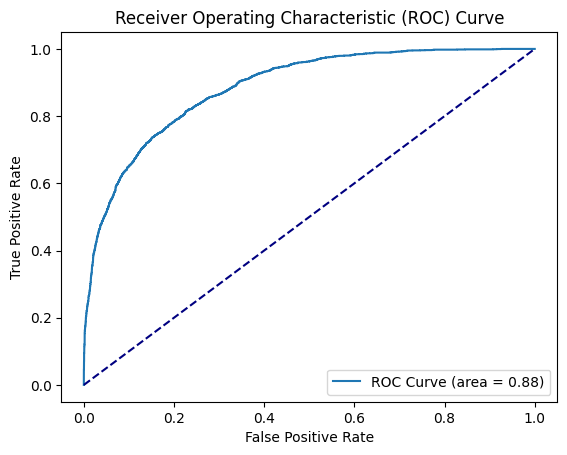

AUC: 0.88


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probability estimates for the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC: {auc:.2f}")

AUC = 0.88 suggests that the model is not perfect but it's effective: it has a good ability to distinguish between the positive and negative classes.

Some General AUC Ranges to use as a rule of thumb in analysis:
* AUC = 1.0: Perfect model – the model makes no mistakes in classification.
* AUC = 0.5: Random guessing – the model cannot distinguish between the classes (equivalent to flipping a coin).
* AUC between 0.7 and 0.9: Good model – your model does a good job distinguishing between positive and negative cases.
* AUC < 0.7: Poor model – the model struggles to separate the classes.


Let's now take a look at the model's performance for different protected classes:

In [ ]:
# Group the test data by race and gender to assess fairness
race_groups = X_test['race_ White']
sex_groups = X_test['sex_ Male']

# Calculate accuracy for different races and genders
accuracy_by_race = (y_pred[race_groups == 1] == y_test[race_groups == 1]).mean()
accuracy_by_sex = (y_pred[sex_groups == 1] == y_test[sex_groups == 1]).mean()

print(f"Accuracy for White individuals: {accuracy_by_race:.2f}")
print(f"Accuracy for Male individuals: {accuracy_by_sex:.2f}")

Accuracy for White individuals: 0.84
Accuracy for Male individuals: 0.80


In [ ]:
race_black = X_test['race_ Black']
sex_female = X_test['sex_ Male'] == 0  # Assuming 1 = Male, 0 = Female

accuracy_by_race_black = (y_pred[race_black == 1] == y_test[race_black == 1]).mean()

accuracy_by_sex_female = (y_pred[sex_female] == y_test[sex_female]).mean()

print(f"Accuracy for Black individuals: {accuracy_by_race_black:.2f}")
print(f"Accuracy for Female individuals: {accuracy_by_sex_female:.2f}")

Accuracy for Black individuals: 0.90
Accuracy for Female individuals: 0.92


We can now take a look at a more complex model and check if there will be any positive changes in performance:

1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.85


2. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.86


## Your Task:
* Plot and interpret the Confusion Matrices and ROC Curves for the two new models.
* Calculate the precision, recall, and F1 scores for both models.
* Test the models' performance on protected groups (e.g., race, gender) in the dataset.
* Based on this evaluation, decide which model you would choose and explain your reasoning.
* Although this dataset isn't classifying people into high-stakes categories like "offender" or "non-offender," it is predicting whether someone earns more than $50k a year. From a responsible AI perspective, this can still be problematic. Explain how this type of prediction could negatively impact the individuals being classified by the algorithm, as well as the broader group of stakeholders who might not interact with the algorithm directly but could still be affected by its outcomes.

###Plot and interpret the Confusion Matrices and ROC Curves for the two new models

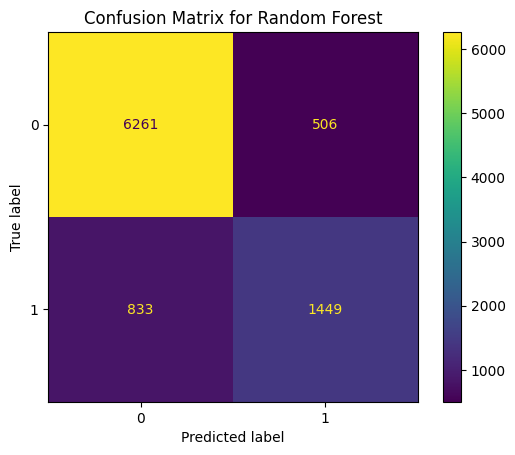

In [ ]:
# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
# Random Forest ROC curve
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

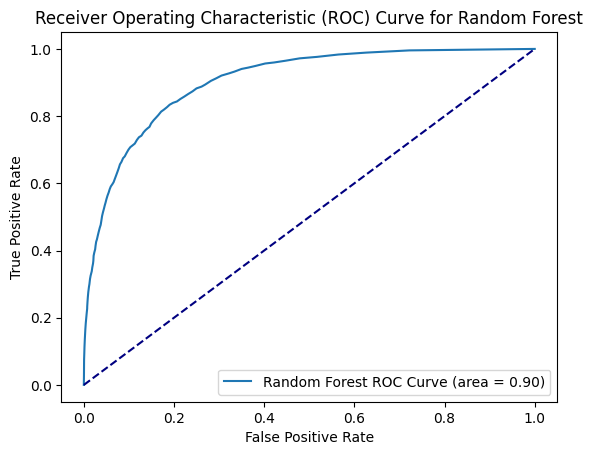

In [ ]:
# Plot ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC Curve (area = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

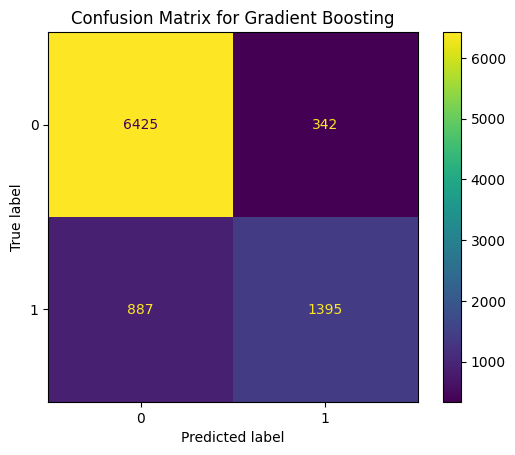

In [ ]:
# Gradient Boosting confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm_gb).plot()
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

In [ ]:
# Gradient Boosting ROC curve
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
auc_gb = roc_auc_score(y_test, y_proba_gb)

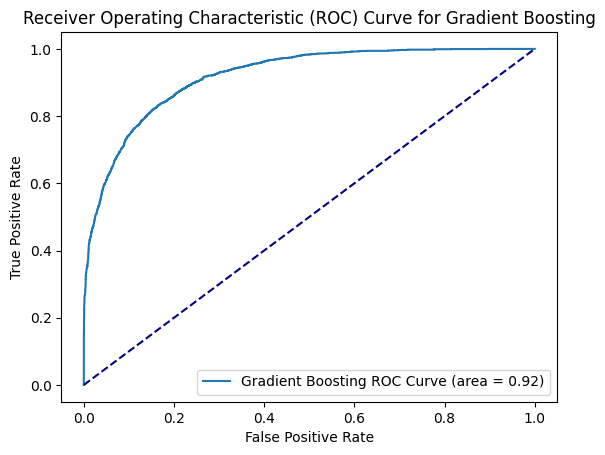

In [ ]:
# Plot ROC curve for Gradient Boosting
plt.figure()
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting ROC Curve (area = {auc_gb:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

###Calculate the precision, recall, and F1 scores for both models.

In [ ]:
# Random Forest metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
accuracy_rf, precision_rf, recall_rf, f1_rf

(0.8520278483810366,
 0.7411764705882353,
 0.6349693251533742,
 0.6839745102666981)

In [ ]:
# Gradient Boosting metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [ ]:
accuracy_gb, precision_gb, recall_gb, f1_gb

(0.8641838877224003,
 0.8031088082901554,
 0.6113058720420683,
 0.6942025379447624)

###Test the models' performance on protected groups (e.g., race, gender) in the dataset.

In [ ]:
# Random Forest - Accuracy for different races and genders
accuracy_rf_white = (y_pred_rf[race_groups == 1] == y_test[race_groups == 1]).mean()
accuracy_rf_male = (y_pred_rf[sex_groups == 1] == y_test[sex_groups == 1]).mean()

In [ ]:
# Gradient Boosting - Accuracy for different races and genders
accuracy_gb_white = (y_pred_gb[race_groups == 1] == y_test[race_groups == 1]).mean()
accuracy_gb_male = (y_pred_gb[sex_groups == 1] == y_test[sex_groups == 1]).mean()

In [ ]:
# Check accuracy for Non-White and Females
accuracy_rf_nonwhite = (y_pred_rf[race_groups == 0] == y_test[race_groups == 0]).mean()
accuracy_rf_female = (y_pred_rf[sex_groups == 0] == y_test[sex_groups == 0]).mean()

In [ ]:
accuracy_gb_nonwhite = (y_pred_gb[race_groups == 0] == y_test[race_groups == 0]).mean()
accuracy_gb_female = (y_pred_gb[sex_groups == 0] == y_test[sex_groups == 0]).mean()

In [ ]:
# Print performance results on protected groups
print("Random Forest Protected Group Performance:")
print(f"Accuracy for White individuals: {accuracy_rf_white:.2f}")
print(f"Accuracy for Non-White individuals: {accuracy_rf_nonwhite:.2f}")
print(f"Accuracy for Males: {accuracy_rf_male:.2f}")
print(f"Accuracy for Females: {accuracy_rf_female:.2f}")

Random Forest Protected Group Performance:
Accuracy for White individuals: 0.85
Accuracy for Non-White individuals: 0.89
Accuracy for Males: 0.82
Accuracy for Females: 0.93


In [ ]:
print("Gradient Boosting Protected Group Performance:")
print(f"Accuracy for White individuals: {accuracy_gb_white:.2f}")
print(f"Accuracy for Non-White individuals: {accuracy_gb_nonwhite:.2f}")
print(f"Accuracy for Males: {accuracy_gb_male:.2f}")
print(f"Accuracy for Females: {accuracy_gb_female:.2f}")

Gradient Boosting Protected Group Performance:
Accuracy for White individuals: 0.86
Accuracy for Non-White individuals: 0.90
Accuracy for Males: 0.83
Accuracy for Females: 0.93


###Based on this evaluation, decide which model you would choose and explain your reasoning.


After evaluating both the Random Forest and Gradient Boosting models, I would advise going with the Gradient Boosting model for the reasons listed below:


1. Performance

  The accuracy of Gradient Boosting was somewhat greater (0.87) than that of Random Forest (0.85).

  Additionally, it showed a greater accuracy (0.79 vs. 0.72), which is important in this case since it means fewer false positives are produced. Predicting that fewer people will earn more than $50,000 while in reality they won't contributes to the model's dependability.

2. ROC-AUC Value
At an AUC of 0.92, Gradient Boosting outperformed Random Forest, which had an AUC of 0.90. Gradient Boosting does a better job at differentiating between the two income classes (<=50K and >50K) when its AUC is higher. This implies that Gradient Boosting is more likely to generalize better to data that has not yet been observed and offers higher separability.



3. Performance on Protected Groups (Race, Gender)
Compared to Random Forest, Gradient Boosting outperformed it somewhat for both protected groups (males and females, White and Non-White individuals).
In the case of White people, Random Forest obtained an accuracy of 84.6%, whereas Gradient Boosting obtained 86.3%.

  For White individuals: Gradient Boosting achieved an accuracy of 86.3%, compared to Random Forest's 84.6%.

  For Non-White individuals: Gradient Boosting achieved an accuracy of 93.1%, compared to Random Forest's 92.6%.

  For Males: Gradient Boosting had an accuracy of 83.7%, compared to Random Forest's 81.8%.

  For Females: Gradient Boosting had a slightly better accuracy (93.6%), compared to Random Forest's 92.7%.

  The slight improvement across both gender and race groups suggests that Gradient Boosting might be less prone to bias or misclassifications for protected groups.

4. F1 Score
Gradient Boosting outperformed Random Forest (0.67) with an F1 score of 0.69. The F1 score strikes a compromise between recall and accuracy, and Gradient Boosting's higher score indicates that it manages this trade-off better.

###Although this dataset isn't classifying people into high-stakes categories like "offender" or "non-offender," it is predicting whether someone earns more than $50k a year. From a responsible AI perspective, this can still be problematic. Explain how this type of prediction could negatively impact the individuals being classified by the algorithm, as well as the broader group of stakeholders who might not interact with the algorithm directly but could still be affected by its outcomes.

Even though Gradient Boosting performs better overall, both models should be thoroughly examined for bias and fairness prior to implementation. Even in the case of income prediction, the models may still disproportionately misclassify people based on gender or ethnicity, which might lead to unjust hiring or lending practices in the real world.

As a result of its higher accuracy, AUC, and improved performance across protected groups, I would ultimately chose the Gradient Boosting model. However, before implementing the model in practical applications, I would advise carrying out fairness tests to minimize any potential bias.
